## Stochastic Oscillator

Now moving onto my favourite technical analysis, but of course another overbought-oversold indicator because that's all there is to technical analysis.

_**Formula**_

$ \%K = \frac {C - L14}{H14 - L14} \times 100 $

where:

$\bullet$ $ \%K $ is typically called the **Fast Stochastic.**

$\bullet$ $ C $ is the most recent closing price.

$\bullet$ $ L14 $ is the lowest traded price over the last 14 days.

$\bullet$ $ H14 $ is the highest traded price over the last 14 days.

On top of the *Fast Stochastic* we also have something called the **Slow Stochastic.**
<br>
The *Slow Stochastic* is simply a 3-day moving average of the *Fast Stochastic.*
<br>
Now it may occur to you that there could be 2 different measurements indicators and you would be correct: the first indicator is when the *Fast Stochastic* hits the ceiling and floor; and the second indicator is when the *Slow Stochastic* crosses the *Fast Stochastic* similar to a moving average indicator.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set_style('darkgrid')

import pandas_datareader as pdr

In [8]:
ticker = input('Please input the ticker you want to look at: ').upper()

start = '2017-01-01'
end = '2021-01-01'

stock = pdr.DataReader(ticker, 'yahoo', start, end)
highs = stock['High']
lows = stock['Low']
data = stock['Adj Close']
volume = stock['Volume']

floor = 20
ceiling = 80

Please input the ticker you want to look at:  MRNA


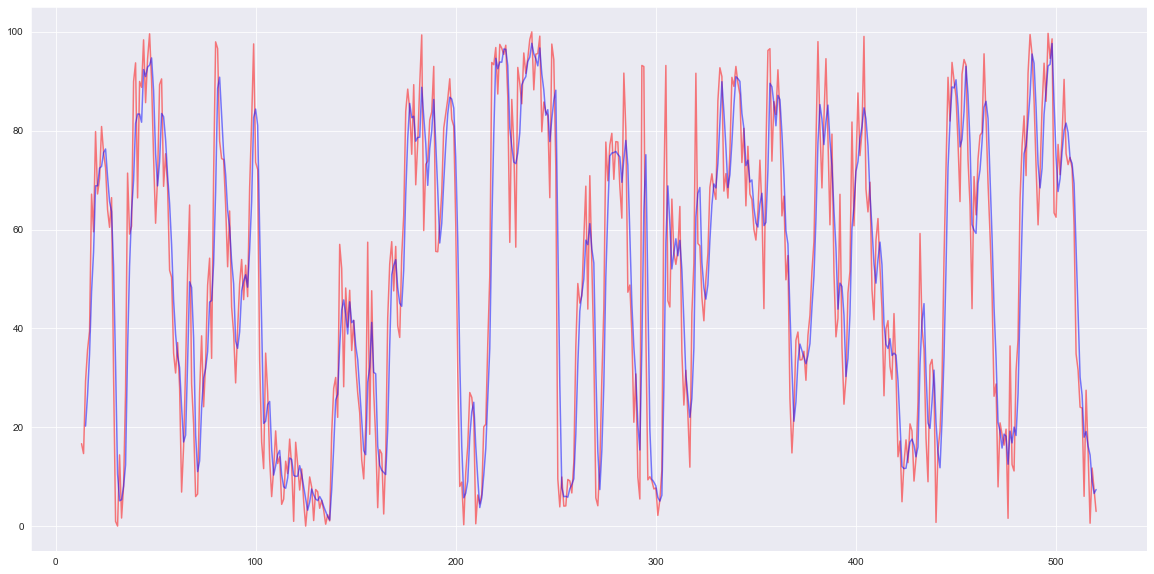

,Fast Stochastic (%K),Slow Stochastic (%D)
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
516,15.035840,15.493974
517,0.585772,13.614332
518,11.749064,8.174457
519,7.471739,5.560566


In [9]:
period = 14
lows_stochastic = lows.rolling(window=period).min()
highs_stochastic = highs.rolling(window=period).max()

fast_stochastic = [(100 * (data[i] - lows_stochastic[i]) / (highs_stochastic[i] - lows_stochastic[i])) for i in range(len(data))]
# %K formula

stochastic_dataframe = pd.DataFrame({'Fast Stochastic (%K)': fast_stochastic})
# We have to convert the fast stochastic data into a dataframe or series in order for
# us to use the rolling function down below.
# The function is not a Python in-built function but a Pandas function therefore we have 
# to make the data into a Pandas format.

slow_stochastic = stochastic_dataframe['Fast Stochastic (%K)'].rolling(window=3).mean()
stochastic_dataframe['Slow Stochastic (%D)'] = slow_stochastic

plt.figure(figsize=(20,10))
plt.plot(fast_stochastic, alpha=0.5, c='r')
plt.plot(slow_stochastic, alpha=0.5, c='b')
plt.show();

# We see the data is between some large obsucure numbers - let's normalise the data

def normalise_data(data):
    return (data - np.min(data))/(np.max(data) - np.min(data))

stochastic_dataframe['Fast Stochastic (%K)'] = normalise_data(stochastic_dataframe['Fast Stochastic (%K)']) * 100
stochastic_dataframe['Slow Stochastic (%D)'] = normalise_data(stochastic_dataframe['Slow Stochastic (%D)']) * 100
stochastic_dataframe

In [10]:
# Stochastic Floor/Ceiling Buy/Sell function
def stochastic_fc_buysell(data, floor, ceiling, stochastic):
    signal_buy_price = []
    signal_sell_price = []
    flag = -1
    
    for i in range(len(data)):
        if stochastic[i] <= floor and flag != 1:
            signal_buy_price.append(data[i])
            signal_sell_price.append(np.nan)
            flag = 1
        elif stochastic[i] >= ceiling and flag != 0:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(data[i])
            flag = 0
        else:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(np.nan)
        
    return signal_buy_price, signal_sell_price

# Stochastic Crossover Buy/Sell function
def stochastic_x_buysell(data, fast_stochastic, slow_stochastic):
    signal_buy_price = []
    signal_sell_price = []
    flag = -1
    
    for i in range(0, len(data)):
        if slow_stochastic[i] > fast_stochastic[i] and flag != 1:
            signal_buy_price.append(data[i])
            signal_sell_price.append(np.nan)
            flag = 1
        elif slow_stochastic[i] < fast_stochastic[i] and flag != 0:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(data[i])
            flag = 0
        else:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(np.nan)
            
    return signal_buy_price, signal_sell_price

In [11]:
buy, sell = stochastic_fc_buysell(data, 20, 80, slow_stochastic)
xbuy, xsell = stochastic_x_buysell(data, fast_stochastic, slow_stochastic)

In [12]:
stochastic_dataframe['Stochastic F/C Buy Price'] = buy
stochastic_dataframe['Stochastic F/C Sell Price'] = sell
stochastic_dataframe['Stochastic Crossover Buy Price'] = xbuy
stochastic_dataframe['Stochastic Crossover Sell Price'] = xsell
stochastic_dataframe['Index'] = data.index
stochastic_dataframe = stochastic_dataframe.set_index('Index')
stochastic_dataframe[f'{ticker} Share Price'] = data
stochastic_dataframe

,Fast Stochastic (%K),Slow Stochastic (%D),Stochastic F/C Buy Price,Stochastic F/C Sell Price,Stochastic Crossover Buy Price,Stochastic Crossover Sell Price,MRNA Share Price
Index,,,,,,,
2018-12-07,NaN,NaN,NaN,NaN,NaN,NaN,18.600000
2018-12-10,NaN,NaN,NaN,NaN,NaN,NaN,18.799999
2018-12-11,NaN,NaN,NaN,NaN,NaN,NaN,18.010000
2018-12-12,NaN,NaN,NaN,NaN,NaN,NaN,18.680000
2018-12-13,NaN,NaN,NaN,NaN,NaN,NaN,18.760000
...,...,...,...,...,...,...,...
2020-12-24,15.035840,15.493974,NaN,NaN,123.389999,NaN,123.389999
2020-12-28,0.585772,13.614332,NaN,NaN,NaN,NaN,111.400002
2020-12-29,11.749064,8.174457,NaN,NaN,NaN,114.389999,114.389999


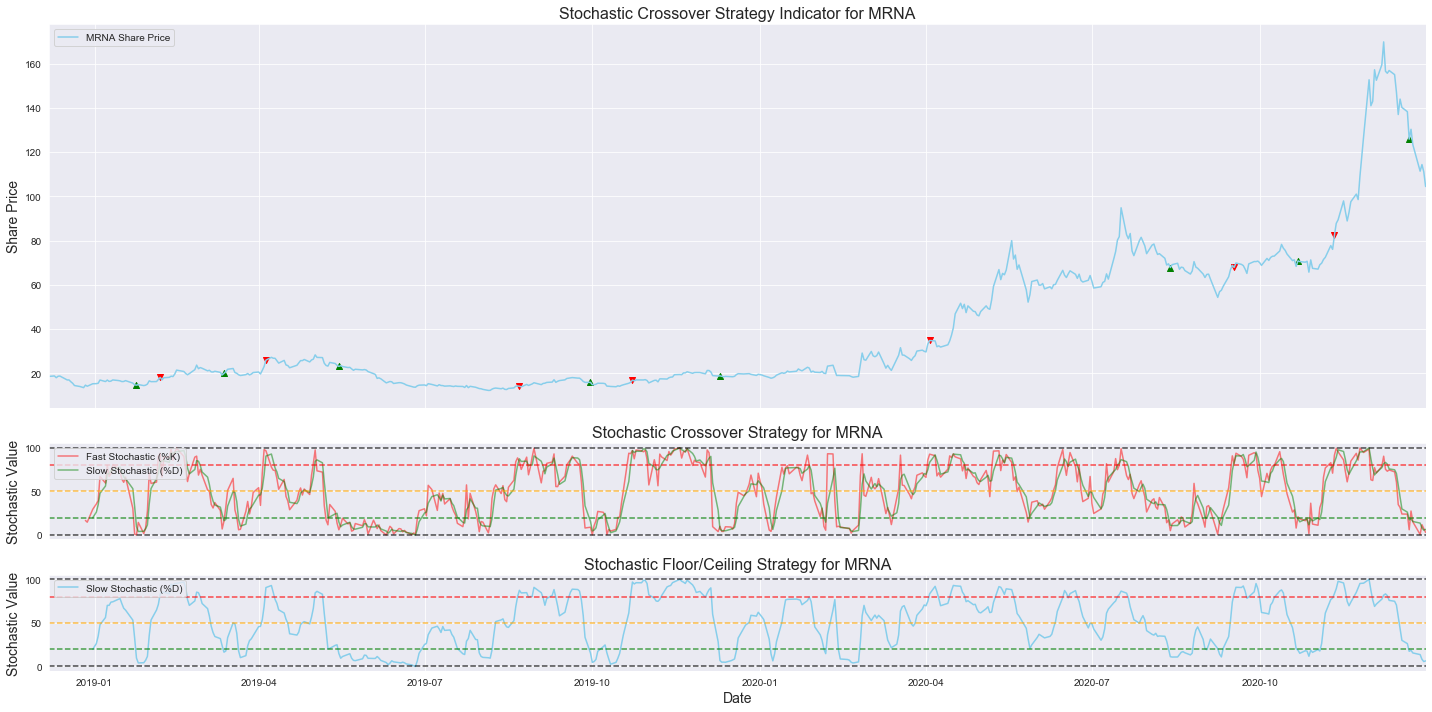

In [13]:
fig, ax = plt.subplots(3, figsize=(20,10), sharex='col', gridspec_kw={'height_ratios':[2, 0.5, 0.5]})
ax[0].plot(stochastic_dataframe[f'{ticker} Share Price'], label=f'{ticker} Share Price', c='skyblue')
ax[0].scatter(stochastic_dataframe.index, stochastic_dataframe['Stochastic F/C Buy Price'], marker='^', c='g')
ax[0].scatter(stochastic_dataframe.index, stochastic_dataframe['Stochastic F/C Sell Price'], marker='v', c='r')
ax[0].set_ylabel('Share Price', fontsize=14)
ax[0].set_title(f'Stochastic Crossover Strategy Indicator for {ticker}', fontsize=16)
ax[0].legend(loc='upper left')
# It would make sense for us to create a function of the plots here so we can specify what indicators to display
# when we call the function - we will do this later.

ax[1].plot(stochastic_dataframe['Fast Stochastic (%K)'], c='r', alpha=0.5, label='Fast Stochastic (%K)')
ax[1].plot(stochastic_dataframe['Slow Stochastic (%D)'], c='g', alpha=0.5, label='Slow Stochastic (%D)')
ax[1].axhline(y=ceiling, c='r', ls = '--', alpha=0.7)
ax[1].axhline(y=floor, c='g', ls ='--', alpha=0.7)
ax[1].axhline(y=100, c='k', ls = '--', alpha=0.7)
ax[1].axhline(y=50, c='orange', ls = '--', alpha=0.7)
ax[1].axhline(y=0, c='k', ls = '--', alpha=0.7)
ax[1].set_ylabel('Stochastic Value', fontsize=14)
ax[1].set_title(f'Stochastic Crossover Strategy for {ticker}', fontsize=16)
ax[1].legend(loc='upper left')

ax[2].plot(stochastic_dataframe['Slow Stochastic (%D)'], c='skyblue', label='Slow Stochastic (%D)')
ax[2].axhline(y=ceiling, c='r', ls = '--', alpha=0.7)
ax[2].axhline(y=floor, c='g', ls ='--', alpha=0.7)
ax[2].axhline(y=100, c='k', ls = '--', alpha=0.7)
ax[2].axhline(y=50, c='orange', ls = '--', alpha=0.7)
ax[2].axhline(y=0, c='k', ls = '--', alpha=0.7)
ax[2].set_ylabel('Stochastic Value', fontsize=14)
ax[2].set_xlabel('Date', fontsize=14)
ax[2].set_title(f'Stochastic Floor/Ceiling Strategy for {ticker}', fontsize=16)
ax[2].legend(loc='upper left')

plt.subplots_adjust(hspace=0)
plt.margins(x=0)
plt.tight_layout()
plt.show();

Please input the ticker you want to look at:  MRNA


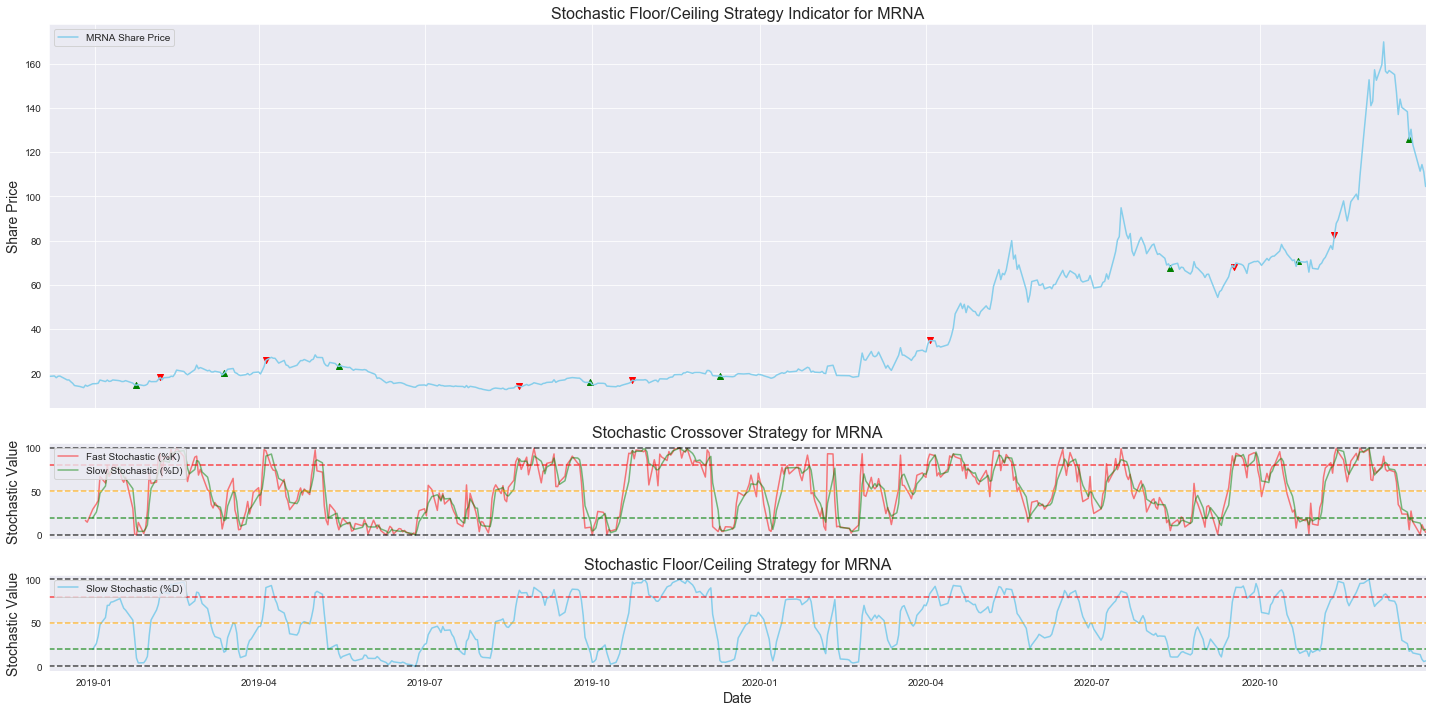

In [14]:
# In summary:

ticker = input('Please input the ticker you want to look at: ').upper()

start = '2017-01-01'
end = '2021-01-01'

stock = pdr.DataReader(ticker, 'yahoo', start, end)
highs = stock['High']
lows = stock['Low']
data = stock['Adj Close']
volume = stock['Volume']

period = 14
lows_stochastic = lows.rolling(window=period).min()
highs_stochastic = highs.rolling(window=period).max()
fast_stochastic = [(100 * (data[i] - lows_stochastic[i]) / (highs_stochastic[i] - lows_stochastic[i])) for i in range(len(data))]
stochastic_dataframe = pd.DataFrame({'Fast Stochastic (%K)': fast_stochastic})
slow_stochastic = stochastic_dataframe['Fast Stochastic (%K)'].rolling(window=3).mean()
stochastic_dataframe['Slow Stochastic (%D)'] = slow_stochastic

# Data Normalisation
def normalise_data(data):
    return (data - np.min(data))/(np.max(data) - np.min(data))

stochastic_dataframe['Fast Stochastic (%K)'] = normalise_data(stochastic_dataframe['Fast Stochastic (%K)']) * 100
stochastic_dataframe['Slow Stochastic (%D)'] = normalise_data(stochastic_dataframe['Slow Stochastic (%D)']) * 100
stochastic_dataframe

# Stochastic Floor/Ceiling Buy/Sell function
def stochastic_fc_buysell(data, floor, ceiling, stochastic):
    signal_buy_price = []
    signal_sell_price = []
    flag = -1
    
    for i in range(len(data)):
        if stochastic[i] <= floor and flag != 1:
            signal_buy_price.append(data[i])
            signal_sell_price.append(np.nan)
            flag = 1
        elif stochastic[i] >= ceiling and flag != 0:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(data[i])
            flag = 0
        else:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(np.nan)
        
    return signal_buy_price, signal_sell_price

# Stochastic Crossover Buy/Sell function
def stochastic_x_buysell(data, fast_stochastic, slow_stochastic):
    signal_buy_price = []
    signal_sell_price = []
    flag = -1
    
    for i in range(0, len(data)):
        if slow_stochastic[i] > fast_stochastic[i] and flag != 1:
            signal_buy_price.append(data[i])
            signal_sell_price.append(np.nan)
            flag = 1
        elif slow_stochastic[i] < fast_stochastic[i] and flag != 0:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(data[i])
            flag = 0
        else:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(np.nan)
            
    return signal_buy_price, signal_sell_price

buy, sell = stochastic_fc_buysell(data, floor, ceiling, slow_stochastic)
xbuy, xsell = stochastic_x_buysell(data, fast_stochastic, slow_stochastic)

stochastic_dataframe['Stochastic F/C Buy Price'] = buy
stochastic_dataframe['Stochastic F/C Sell Price'] = sell
stochastic_dataframe['Stochastic Crossover Buy Price'] = xbuy
stochastic_dataframe['Stochastic Crossover Sell Price'] = xsell
stochastic_dataframe['Index'] = data.index
stochastic_dataframe = stochastic_dataframe.set_index('Index')
stochastic_dataframe[f'{ticker} Share Price'] = data

# Plot
fig, ax = plt.subplots(3, figsize=(20,10), sharex='col', gridspec_kw={'height_ratios':[2, 0.5, 0.5]})
ax[0].plot(stochastic_dataframe[f'{ticker} Share Price'], label=f'{ticker} Share Price', c='skyblue')
ax[0].scatter(stochastic_dataframe.index, stochastic_dataframe['Stochastic F/C Buy Price'], marker='^', c='g')
ax[0].scatter(stochastic_dataframe.index, stochastic_dataframe['Stochastic F/C Sell Price'], marker='v', c='r')
ax[0].set_ylabel('Share Price', fontsize=14)
ax[0].set_title(f'Stochastic Floor/Ceiling Strategy Indicator for {ticker}', fontsize=16)
ax[0].legend(loc='upper left')
# It would make sense for us to create a function of the plots here so we can specify what indicators to display
# when we call the function - we will do this later.

ax[1].plot(stochastic_dataframe['Fast Stochastic (%K)'], c='r', alpha=0.5, label='Fast Stochastic (%K)')
ax[1].plot(stochastic_dataframe['Slow Stochastic (%D)'], c='g', alpha=0.5, label='Slow Stochastic (%D)')
ax[1].axhline(y=ceiling, c='r', ls = '--', alpha=0.7)
ax[1].axhline(y=floor, c='g', ls ='--', alpha=0.7)
ax[1].axhline(y=100, c='k', ls = '--', alpha=0.7)
ax[1].axhline(y=50, c='orange', ls = '--', alpha=0.7)
ax[1].axhline(y=0, c='k', ls = '--', alpha=0.7)
ax[1].set_ylabel('Stochastic Value', fontsize=14)
ax[1].set_title(f'Stochastic Crossover Strategy for {ticker}', fontsize=16)
ax[1].legend(loc='upper left')

ax[2].plot(stochastic_dataframe['Slow Stochastic (%D)'], c='skyblue', label='Slow Stochastic (%D)')
ax[2].axhline(y=ceiling, c='r', ls = '--', alpha=0.7)
ax[2].axhline(y=floor, c='g', ls ='--', alpha=0.7)
ax[2].axhline(y=100, c='k', ls = '--', alpha=0.7)
ax[2].axhline(y=50, c='orange', ls = '--', alpha=0.7)
ax[2].axhline(y=0, c='k', ls = '--', alpha=0.7)
ax[2].set_ylabel('Stochastic Value', fontsize=14)
ax[2].set_xlabel('Date', fontsize=14)
ax[2].set_title(f'Stochastic Floor/Ceiling Strategy for {ticker}', fontsize=16)
ax[2].legend(loc='upper left')

plt.subplots_adjust(hspace=0)
plt.margins(x=0)
plt.tight_layout()
plt.show();